In [1]:
import pandas
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

FILE_NAME = "census_income"

df_pydl = pandas.read_csv("census_income2 cython/save/"+FILE_NAME+"_relab.csv")
df_pydl2 = pandas.read_csv("census_income2 cython/save/"+FILE_NAME+".csv")
df_pydl5 = pandas.read_csv("census_income5 cython/save/"+FILE_NAME+".csv")
df_sklearn = pandas.read_csv("census_income2 cython/save/"+FILE_NAME+"_relab_sklearn.csv")

In [3]:
df_pydl5

,k,depth,random_state,clf.error_,clf.accuracy_,confusion,accuracy_pred,accuracy_test,sum_misclassified_train,discrimination_train,...,sum_discrimination_additive_train_abs,discrimination_train_pred,sum_discrimination_additive_train_pred,sum_discrimination_additive_train_pred_abs,discrimination_test,sum_discrimination_additive_test_pred,sum_discrimination_additive_test_pred_abs,duration,min_supp,clf.tree_
0,0,1,1,2882.000000,0.760790,"((139, 35, 2397, 5538), (17, 12, 438, 3472))",0.760790,0.771248,2882,0.197227,...,0.197227,0.014095,0.014095,0.014095,0.007488,0.007488,0.007488,0.379260,2,"{'feat': 19, 'left': {'value': 1, 'error': 47,..."
1,1000,1,1,2896.095459,0.759620,"((139, 35, 2397, 5538), (17, 12, 438, 3472))",0.760790,0.771248,2882,0.197227,...,0.197227,0.014095,0.014095,0.014095,0.007488,0.007488,0.007488,0.359631,2,"{'feat': 19, 'left': {'value': 1, 'error': 61...."
2,2000,1,1,2910.190674,0.758450,"((139, 35, 2397, 5538), (17, 12, 438, 3472))",0.760790,0.771248,2882,0.197227,...,0.197227,0.014095,0.014095,0.014095,0.007488,0.007488,0.007488,0.408252,2,"{'feat': 19, 'left': {'value': 1, 'error': 75...."
3,3000,1,1,2924.286133,0.757280,"((139, 35, 2397, 5538), (17, 12, 438, 3472))",0.760790,0.771248,2882,0.197227,...,0.197227,0.014095,0.014095,0.014095,0.007488,0.007488,0.007488,0.445634,2,"{'feat': 19, 'left': {'value': 1, 'error': 89...."
4,4000,1,1,2938.381348,0.756110,"((139, 35, 2397, 5538), (17, 12, 438, 3472))",0.760790,0.771248,2882,0.197227,...,0.197227,0.014095,0.014095,0.014095,0.007488,0.007488,0.007488,0.365281,2,"{'feat': 19, 'left': {'value': 1, 'error': 103..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,3000,7,96,2895.054688,0.759707,"((215, 72, 2328, 5533), (24, 8, 406, 3462))",0.766434,0.767264,2765,0.201845,...,0.204873,0.027018,0.027018,0.027018,0.033610,0.033610,0.033610,600.591239,2,"{'feat': 0, 'left': {'value': 0, 'error': 235,..."
1116,4000,7,96,2913.119141,0.758207,"((126, 29, 2417, 5576), (20, 9, 410, 3461))",0.762201,0.763944,2813,0.201845,...,0.202489,0.011587,0.011587,0.012030,0.017575,0.017575,0.018549,600.530794,2,"{'feat': 0, 'left': {'value': 0, 'error': 235,..."
1117,5000,7,96,2919.550293,0.757673,"((147, 51, 2396, 5554), (31, 43, 399, 3427))",0.760209,0.764940,2840,0.201845,...,0.202200,0.005326,0.005326,0.006110,0.009231,0.009231,0.011206,600.620472,2,"{'feat': 0, 'left': {'value': 0, 'error': 235,..."
1118,10000,7,96,2931.638672,0.756670,"((106, 41, 2437, 5564), (27, 44, 403, 3426))",0.757221,0.761288,2876,0.201845,...,0.202669,-0.000164,-0.000164,0.000664,0.001727,0.001727,0.005676,600.597846,2,"{'feat': 0, 'left': {'value': 0, 'error': 235,..."


In [3]:
list_k = df_pydl["k"].unique()

In [4]:
_COLORS3 = ['#ff0000', '#00ff00', '#0000ff', '#008080']
_COLORS5 = ['#008080', '#ffa500', '#00ff00', '#0000ff', '#ff1493']
_COLORS8 = ['#006400', '#ff0000', '#ffd700', '#c71585', '#00ff00', '#00ffff', '#0000ff', '#1e90ff']
_COLORS11 = ['#8b4513', '#006400', '#4682b4', '#4b0082', '#ff0000', '#ffff00', '#00ff7f', '#00ffff', '#ff00ff', '#ffff54',
             '#ffe4c4']
_COLORS11 = ['#8b4513', '#006400', '#000080', '#ff0000', '#ffff00', '#00ff7f', '#00ffff', '#ff00ff', '#eee8aa', '#6495ed',
             '#ff69b4']

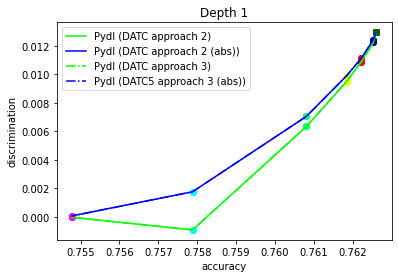

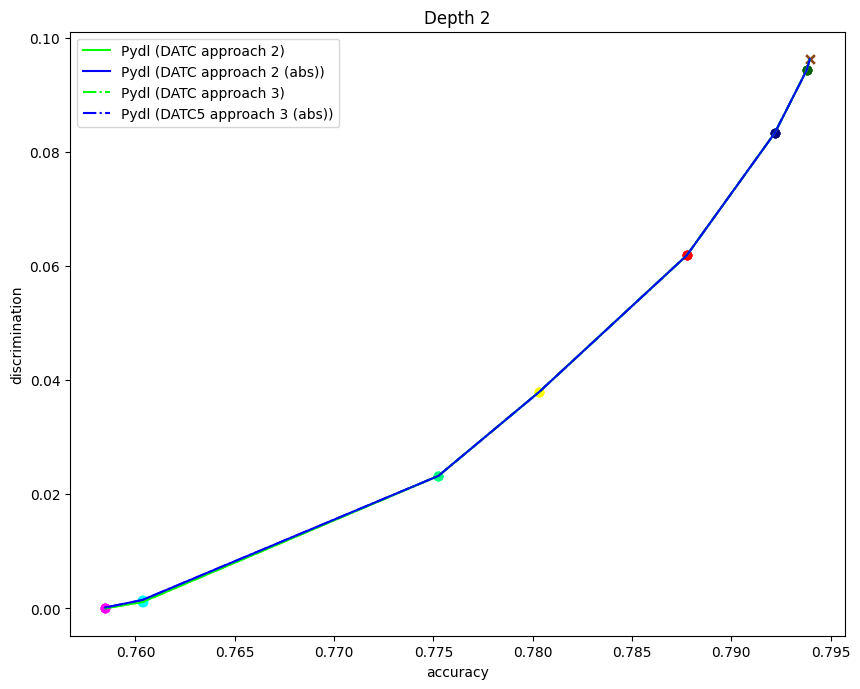

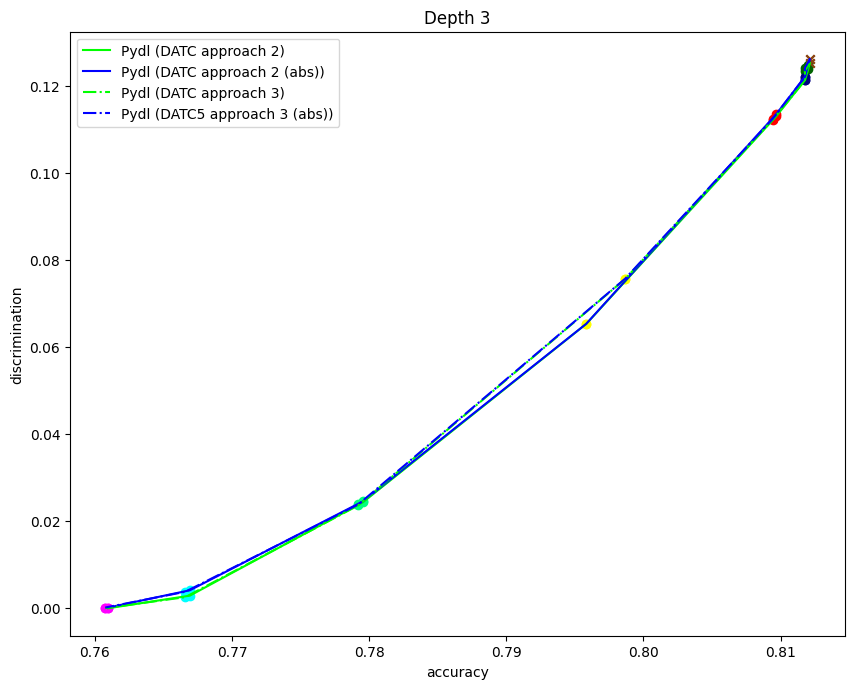

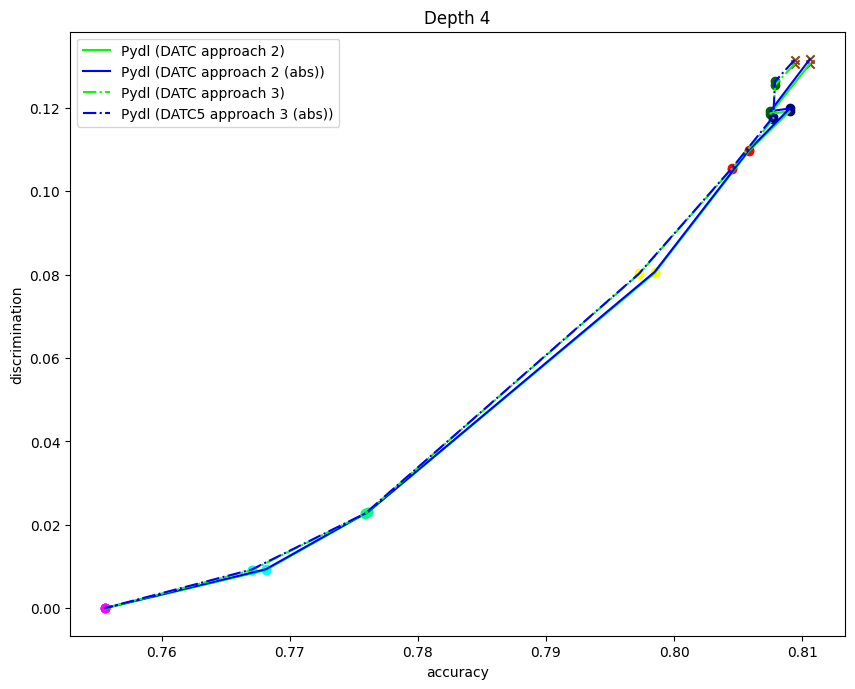

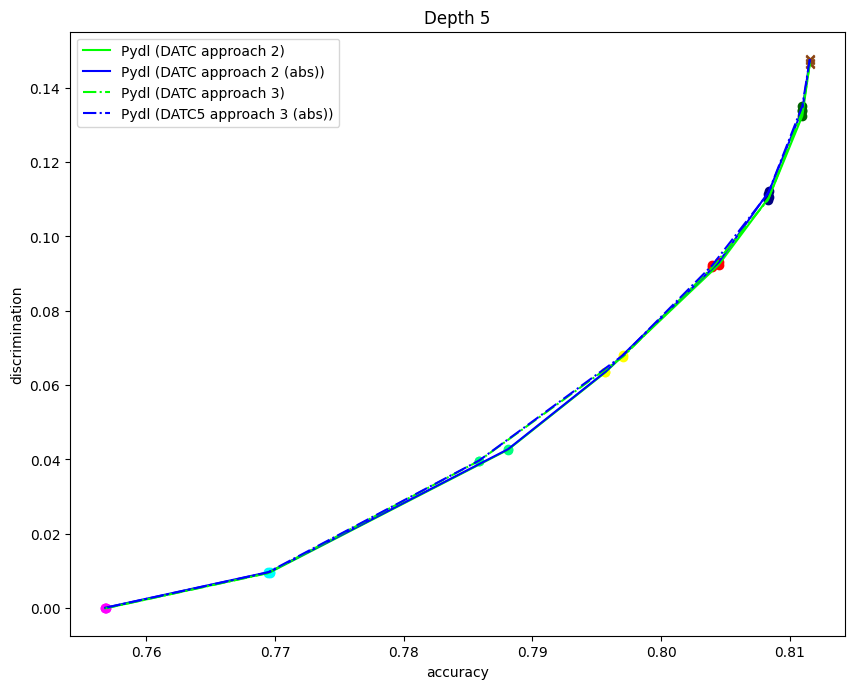

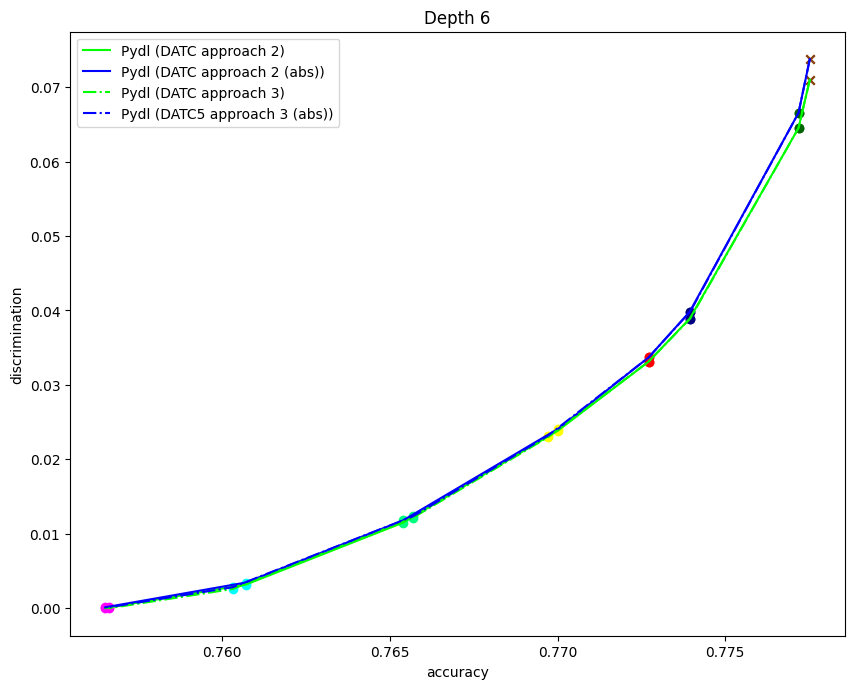

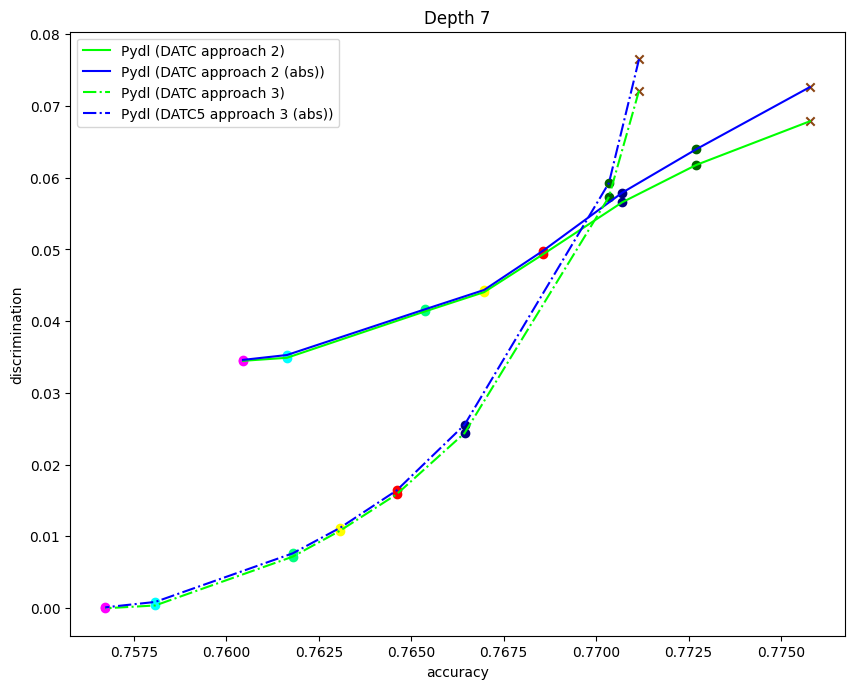

In [5]:
legends = ['< 0', '< 0.1', '< 0.2', '< 0.3', 'no relab']
fig, axes = plt.subplots()

for depth in df_sklearn['depth'].unique():
    index_legends = 0
    y_values = list()
    x_values = list()
    y_values_pydl = list()
    x_values_pydl = list()
    axe2 = ("accuracy_pred", "sum_discrimination_additive_train_pred")
    x_axe = axe2[0]
    y_axe = axe2[1]
    index_legends = 0
    #for k in [0, 1, 5, 10, 50, 100, 250, 500, 1000, 5000, 100000]:
    for k in list_k:
        tmp = df_pydl2.loc[(df_pydl2["k"] == k) & (df_pydl2["depth"] == depth)]
        x_values.append(tmp[x_axe].mean())
        y_values.append(tmp[y_axe].mean())

        if index_legends == 0:
            plt.scatter(tmp[x_axe].mean(), tmp[y_axe].mean(), c=_COLORS11[index_legends], marker='x')
        else:
            plt.scatter(tmp[x_axe].mean(), tmp[y_axe].mean(), c=_COLORS11[index_legends])

        index_legends +=1

    plt.plot(x_values, y_values, label="Pydl (DATC approach 2)", c=_COLORS3[1])

    # PYDL 2
    y_values = list()
    x_values = list()

    axe2 = ("accuracy_pred", "sum_discrimination_additive_train_pred_abs")
    x_axe = axe2[0]
    y_axe = axe2[1]
    index_legends = 0
    #for k in [0, 1, 5, 10, 50, 100, 250, 500, 1000, 5000, 100000]:
    for k in list_k:
        tmp = df_pydl2.loc[(df_pydl2["k"] == k) & (df_pydl2["depth"] == depth)]
        x_values.append(tmp[x_axe].mean())
        y_values.append(tmp[y_axe].mean())

        if index_legends == 0:
            plt.scatter(tmp[x_axe].mean(), tmp[y_axe].mean(), c=_COLORS11[index_legends], marker='x')
        else:
            plt.scatter(tmp[x_axe].mean(), tmp[y_axe].mean(), c=_COLORS11[index_legends])

        index_legends +=1

    plt.plot(x_values, y_values, label="Pydl (DATC approach 2 (abs))", c=_COLORS3[2])

    index_legends = 0
    y_values = list()
    x_values = list()
    y_values_pydl = list()
    x_values_pydl = list()
    axe2 = ("accuracy_pred", "sum_discrimination_additive_train_pred")
    x_axe = axe2[0]
    y_axe = axe2[1]
    index_legends = 0
    #for k in [0, 1, 5, 10, 50, 100, 250, 500, 1000, 5000, 100000]:
    for k in list_k:
        tmp = df_pydl5.loc[(df_pydl5["k"] == k) & (df_pydl5["depth"] == depth)]
        x_values.append(tmp[x_axe].mean())
        y_values.append(tmp[y_axe].mean())

        if index_legends == 0:
            plt.scatter(tmp[x_axe].mean(), tmp[y_axe].mean(), c=_COLORS11[index_legends], marker='x')
        else:
            plt.scatter(tmp[x_axe].mean(), tmp[y_axe].mean(), c=_COLORS11[index_legends])

        index_legends +=1

    plt.plot(x_values, y_values, label="Pydl (DATC approach 3)", c=_COLORS3[1], linestyle='-.')

    # PYDL 2
    y_values = list()
    x_values = list()

    axe2 = ("accuracy_pred", "sum_discrimination_additive_train_pred_abs")
    x_axe = axe2[0]
    y_axe = axe2[1]
    index_legends = 0
    #for k in [0, 1, 5, 10, 50, 100, 250, 500, 1000, 5000, 100000]:
    for k in list_k:
        tmp = df_pydl5.loc[(df_pydl5["k"] == k) & (df_pydl5["depth"] == depth)]
        x_values.append(tmp[x_axe].mean())
        y_values.append(tmp[y_axe].mean())

        if index_legends == 0:
            plt.scatter(tmp[x_axe].mean(), tmp[y_axe].mean(), c=_COLORS11[index_legends], marker='x')
        else:
            plt.scatter(tmp[x_axe].mean(), tmp[y_axe].mean(), c=_COLORS11[index_legends])

        index_legends +=1

    plt.plot(x_values, y_values, label="Pydl (DATC5 approach 3 (abs))", c=_COLORS3[2], linestyle='-.')

    plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
    plt.title(f'Depth {depth}')
    plt.ylabel('discrimination')
    plt.xlabel('accuracy')
    plt.legend()

    plt.show()

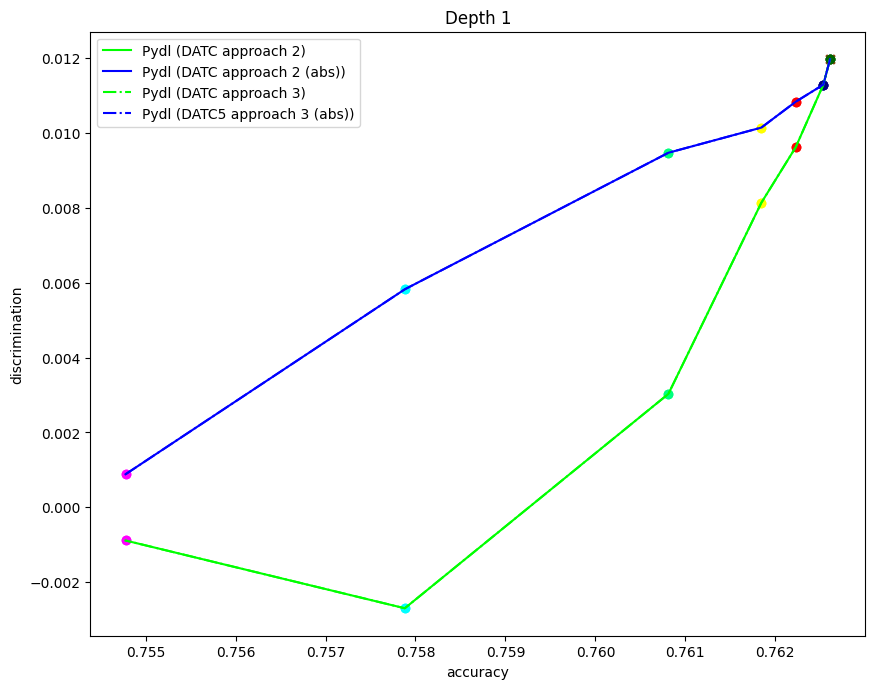

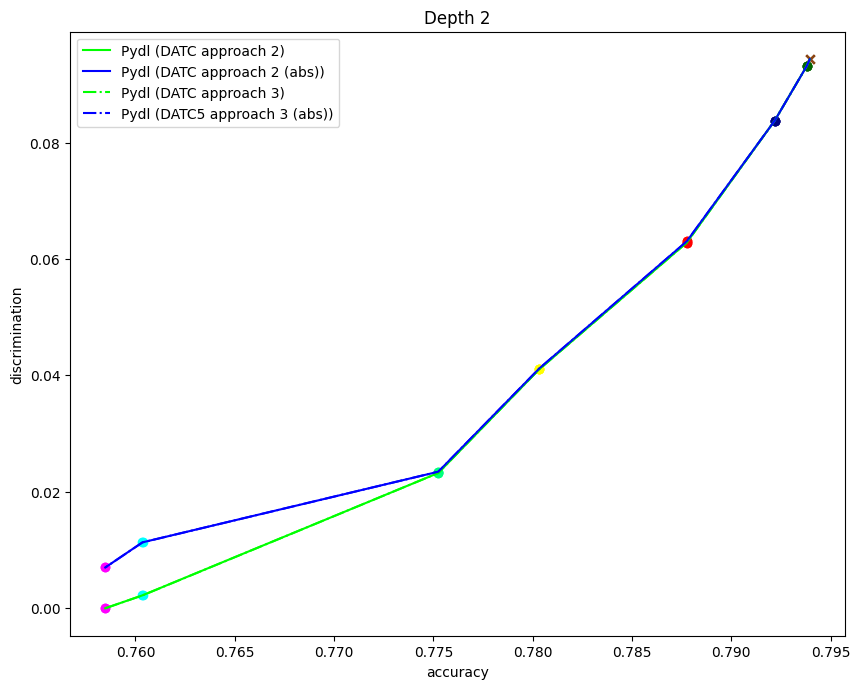

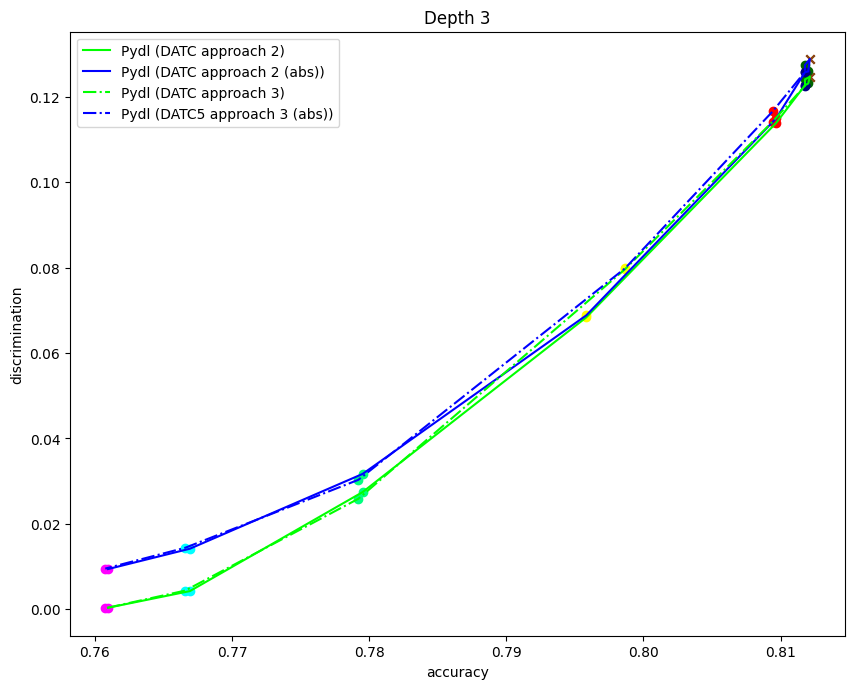

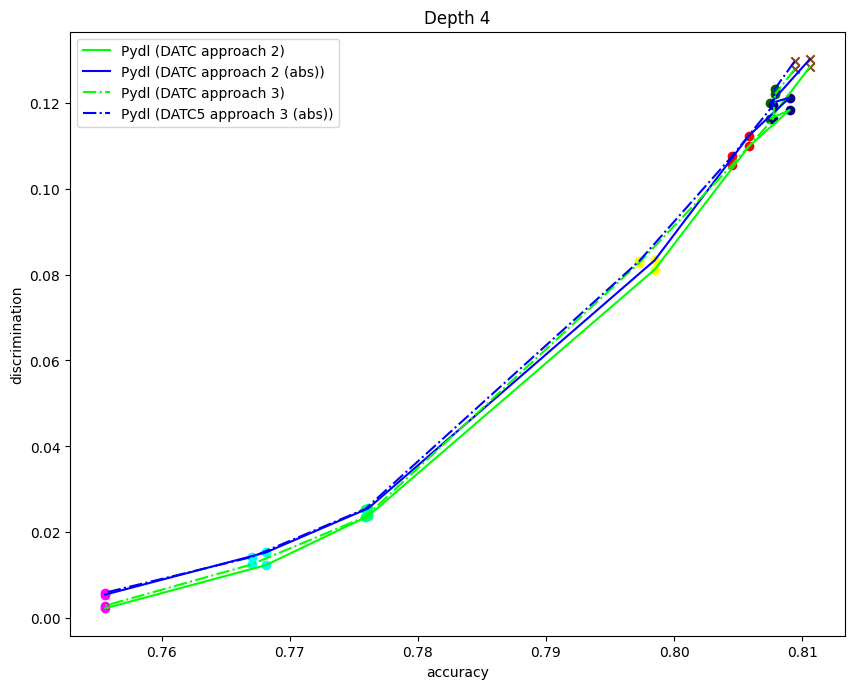

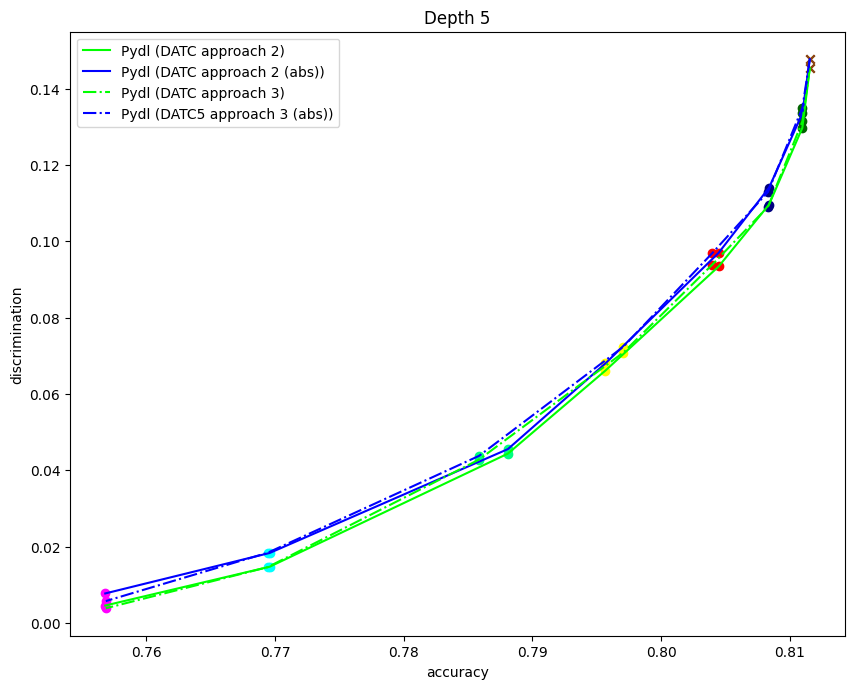

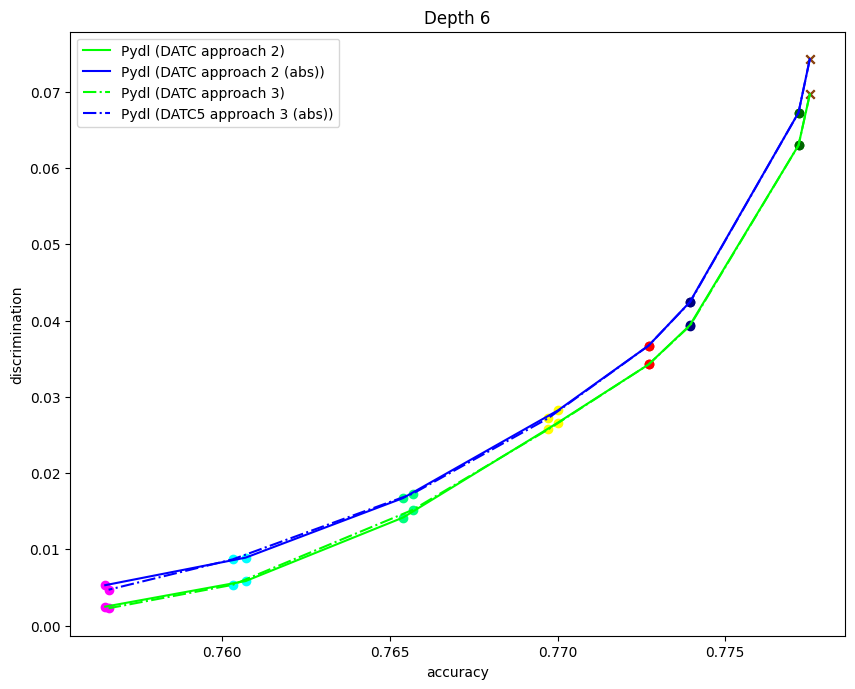

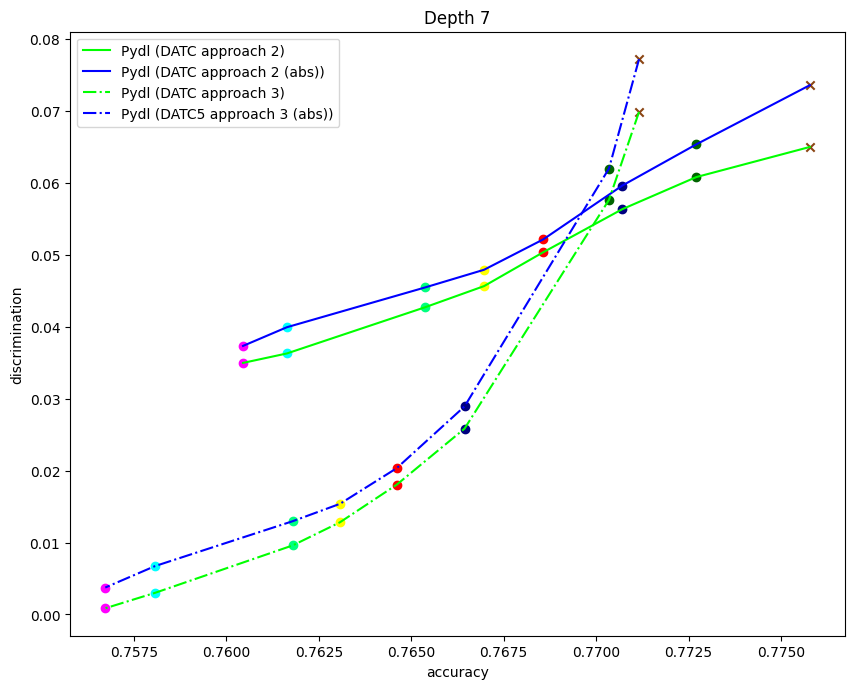

In [6]:
legends = ['< 0', '< 0.1', '< 0.2', '< 0.3', 'no relab']
fig, axes = plt.subplots()

for depth in df_sklearn['depth'].unique():
    index_legends = 0
    y_values = list()
    x_values = list()
    y_values_pydl = list()
    x_values_pydl = list()
    axe2 = ("accuracy_pred", "sum_discrimination_additive_test_pred")
    x_axe = axe2[0]
    y_axe = axe2[1]
    index_legends = 0
    #for k in [0, 1, 5, 10, 50, 100, 250, 500, 1000, 5000, 100000]:
    for k in list_k:
        tmp = df_pydl2.loc[(df_pydl2["k"] == k) & (df_pydl2["depth"] == depth)]
        x_values.append(tmp[x_axe].mean())
        y_values.append(tmp[y_axe].mean())

        if index_legends == 0:
            plt.scatter(tmp[x_axe].mean(), tmp[y_axe].mean(), c=_COLORS11[index_legends], marker='x')
        else:
            plt.scatter(tmp[x_axe].mean(), tmp[y_axe].mean(), c=_COLORS11[index_legends])

        index_legends +=1

    plt.plot(x_values, y_values, label="Pydl (DATC approach 2)", c=_COLORS3[1])

    # PYDL 2
    y_values = list()
    x_values = list()

    axe2 = ("accuracy_pred", "sum_discrimination_additive_test_pred_abs")
    x_axe = axe2[0]
    y_axe = axe2[1]
    index_legends = 0
    #for k in [0, 1, 5, 10, 50, 100, 250, 500, 1000, 5000, 100000]:
    for k in list_k:
        tmp = df_pydl2.loc[(df_pydl2["k"] == k) & (df_pydl2["depth"] == depth)]
        x_values.append(tmp[x_axe].mean())
        y_values.append(tmp[y_axe].mean())

        if index_legends == 0:
            plt.scatter(tmp[x_axe].mean(), tmp[y_axe].mean(), c=_COLORS11[index_legends], marker='x')
        else:
            plt.scatter(tmp[x_axe].mean(), tmp[y_axe].mean(), c=_COLORS11[index_legends])

        index_legends +=1

    plt.plot(x_values, y_values, label="Pydl (DATC approach 2 (abs))", c=_COLORS3[2])

    index_legends = 0
    y_values = list()
    x_values = list()
    y_values_pydl = list()
    x_values_pydl = list()
    axe2 = ("accuracy_pred", "sum_discrimination_additive_test_pred")
    x_axe = axe2[0]
    y_axe = axe2[1]
    index_legends = 0
    #for k in [0, 1, 5, 10, 50, 100, 250, 500, 1000, 5000, 100000]:
    for k in list_k:
        tmp = df_pydl5.loc[(df_pydl5["k"] == k) & (df_pydl5["depth"] == depth)]
        x_values.append(tmp[x_axe].mean())
        y_values.append(tmp[y_axe].mean())

        if index_legends == 0:
            plt.scatter(tmp[x_axe].mean(), tmp[y_axe].mean(), c=_COLORS11[index_legends], marker='x')
        else:
            plt.scatter(tmp[x_axe].mean(), tmp[y_axe].mean(), c=_COLORS11[index_legends])

        index_legends +=1

    plt.plot(x_values, y_values, label="Pydl (DATC approach 3)", c=_COLORS3[1], linestyle='-.')

    # PYDL 2
    y_values = list()
    x_values = list()

    axe2 = ("accuracy_pred", "sum_discrimination_additive_test_pred_abs")
    x_axe = axe2[0]
    y_axe = axe2[1]
    index_legends = 0
    #for k in [0, 1, 5, 10, 50, 100, 250, 500, 1000, 5000, 100000]:
    for k in list_k:
        tmp = df_pydl5.loc[(df_pydl5["k"] == k) & (df_pydl5["depth"] == depth)]
        x_values.append(tmp[x_axe].mean())
        y_values.append(tmp[y_axe].mean())

        if index_legends == 0:
            plt.scatter(tmp[x_axe].mean(), tmp[y_axe].mean(), c=_COLORS11[index_legends], marker='x')
        else:
            plt.scatter(tmp[x_axe].mean(), tmp[y_axe].mean(), c=_COLORS11[index_legends])

        index_legends +=1

    plt.plot(x_values, y_values, label="Pydl (DATC5 approach 3 (abs))", c=_COLORS3[2], linestyle='-.')

    plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
    plt.title(f'Depth {depth}')
    plt.ylabel('discrimination')
    plt.xlabel('accuracy')
    plt.legend()

    plt.show()

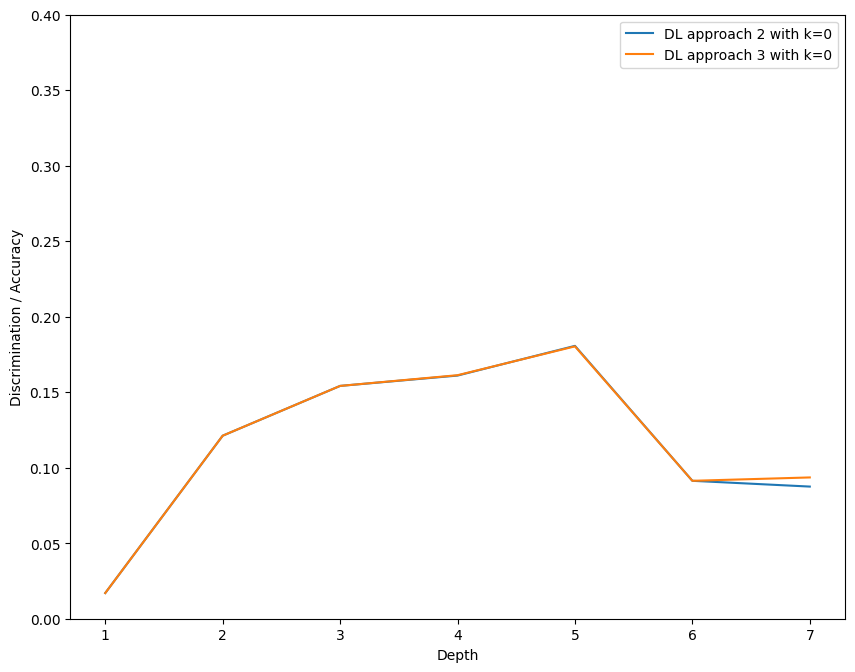

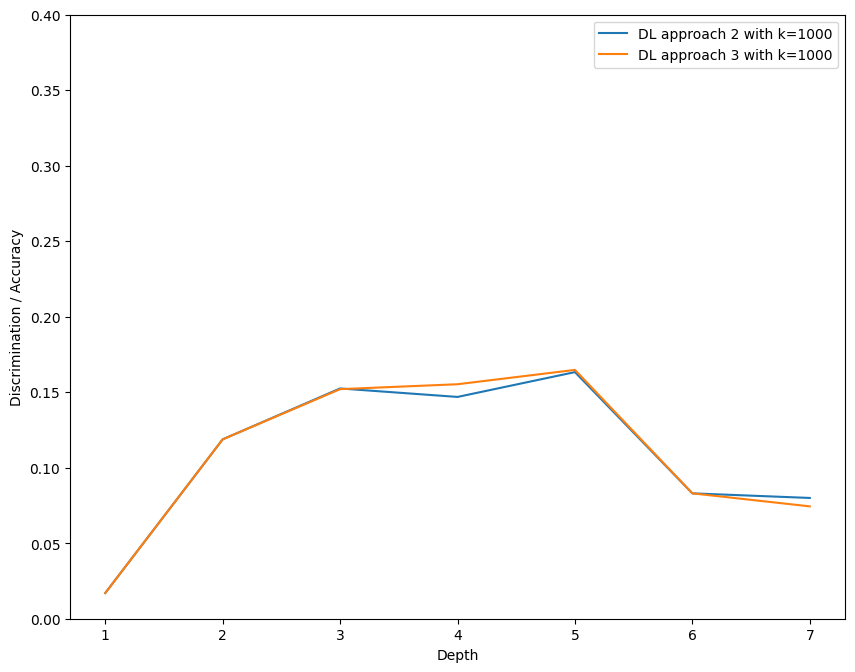

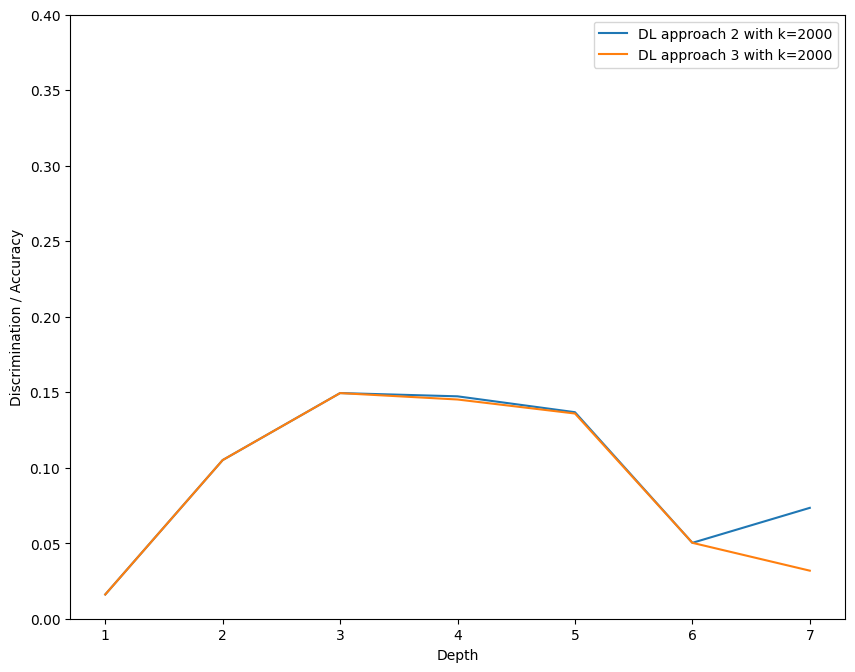

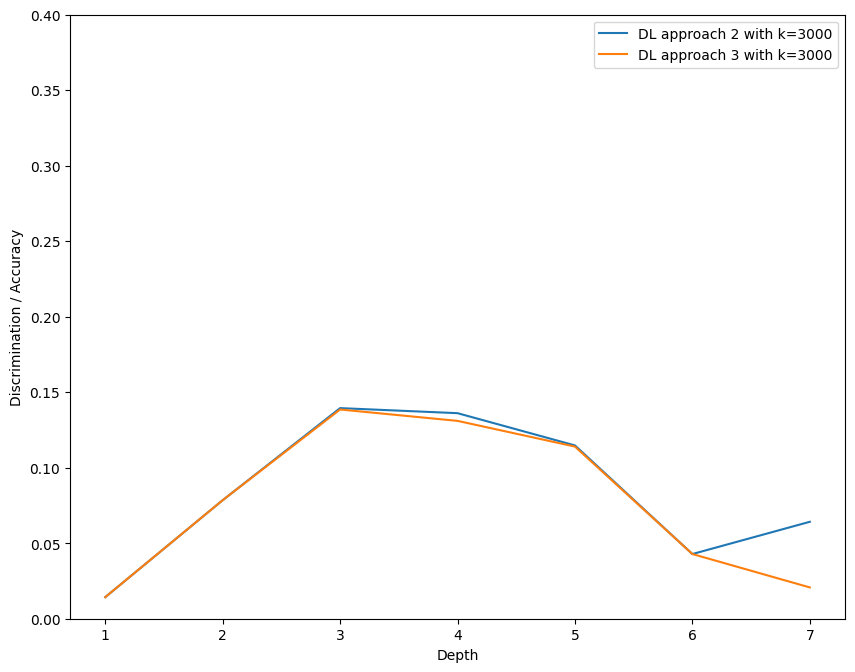

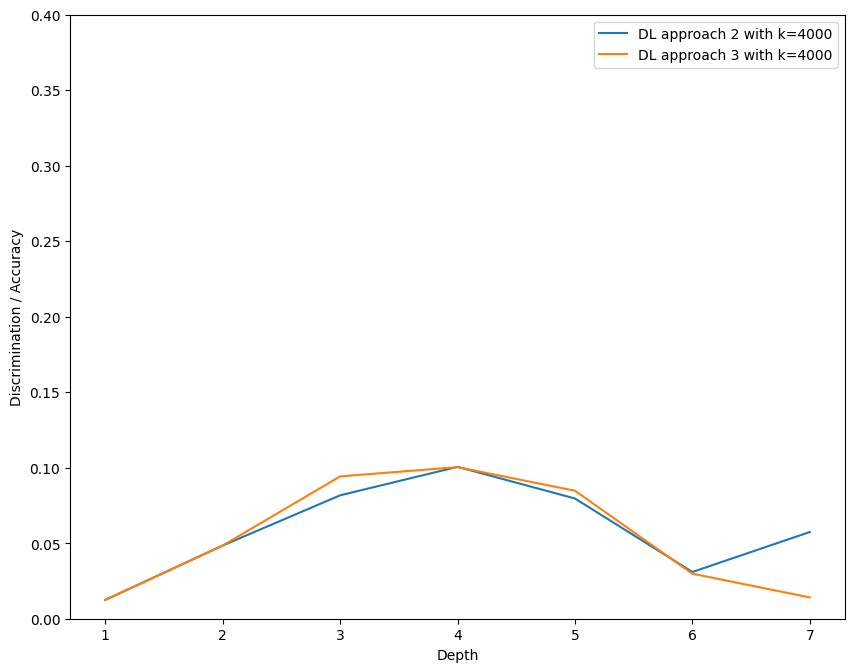

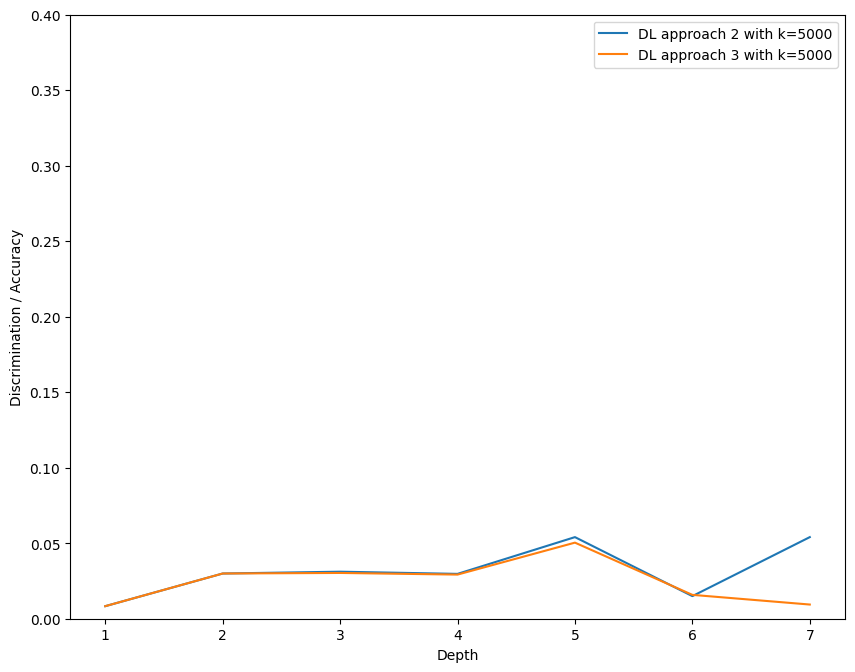

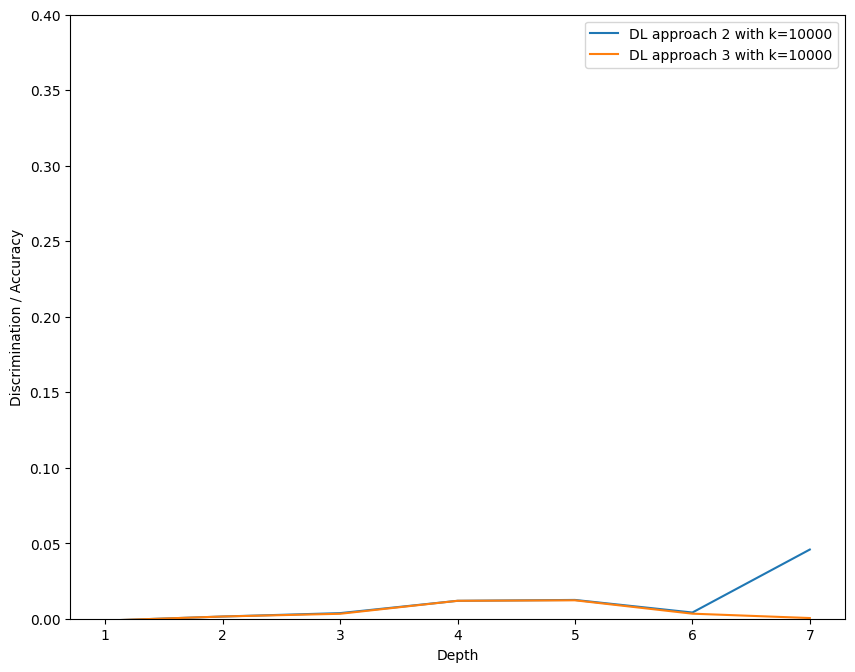

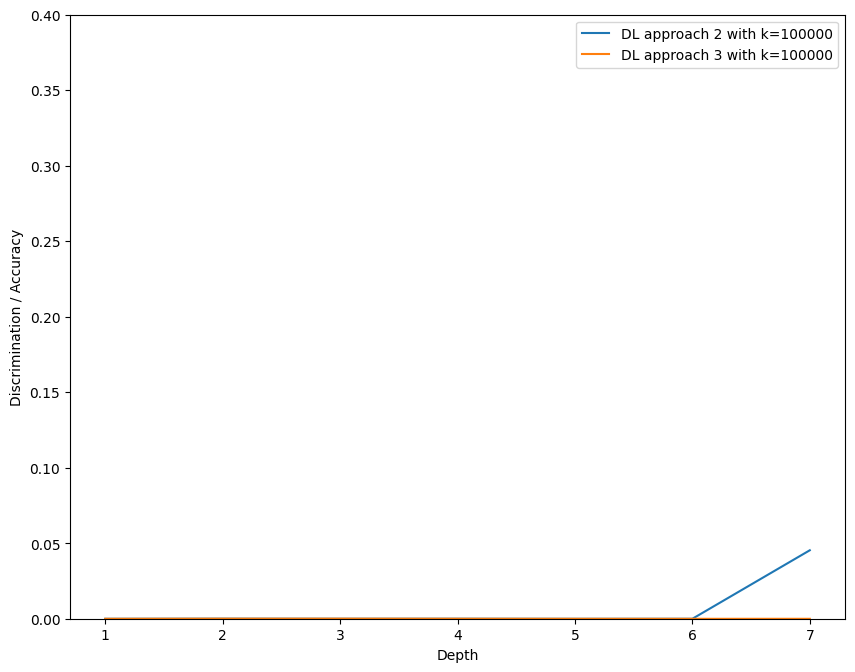

In [7]:
import statistics
def plot2(x_axe, y_axe, r, r2):


    # r = r.loc[r["min_supp"] == 1]
    for k in r['k'].unique():
        fig, ax =  plt.subplots()
        ax.set_ylim(0, 0.4)
    
        x_values = list()
        y_values = list()

        for depth in r['depth'].unique():
            df1 = r.loc[(r["k"] == k) & (r["depth"] == depth)]
            ratio = list()
            for index, row in df1.iterrows():
                ratio.append(row[y_axe] / row[x_axe])
            y_values.append(statistics.mean(ratio))
            x_values.append(depth)
        plt.plot(x_values, y_values, label="DL approach 2 with k=" + str(k))
        
        
        x_values = list()
        y_values = list()

        for depth in r2['depth'].unique():
            df1 = r2.loc[(r2["k"] == k) & (r2["depth"] == depth)]
            ratio = list()
            for index, row in df1.iterrows():
                ratio.append(row[y_axe] / row[x_axe])
            y_values.append(statistics.mean(ratio))
            x_values.append(depth)
        plt.plot(x_values, y_values, label="DL approach 3 with k=" + str(k))

        plt.ylabel("Discrimination"+" / "+"Accuracy")
        plt.xlabel("Depth")
        plt.legend()

        plt.show()
    
plot2("accuracy_pred", "discrimination_train_pred", df_pydl2, df_pydl5)

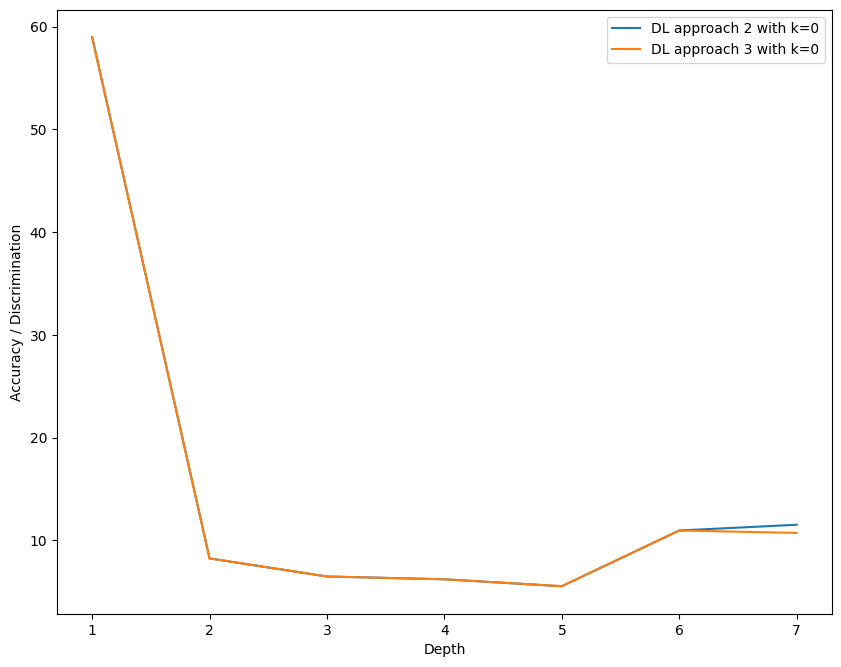

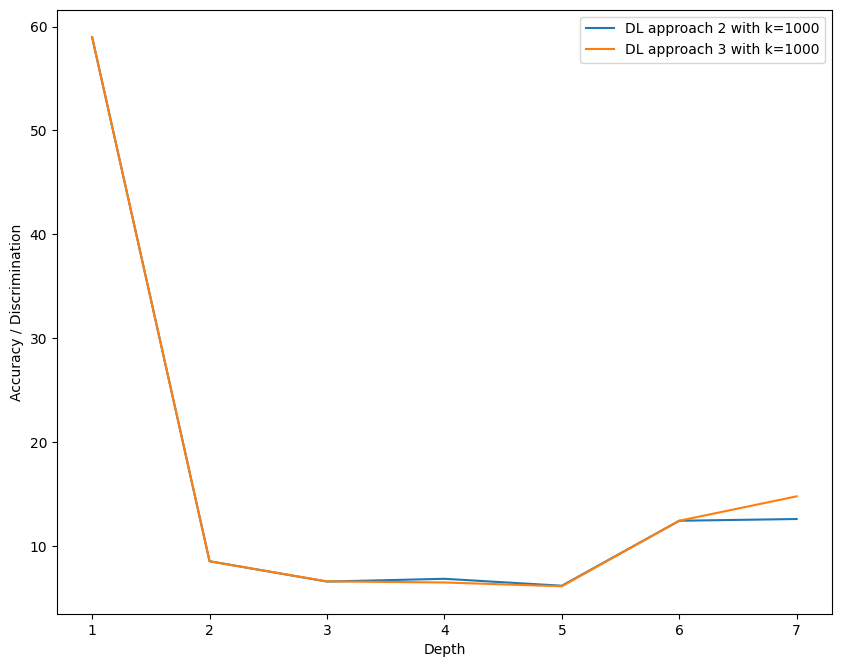

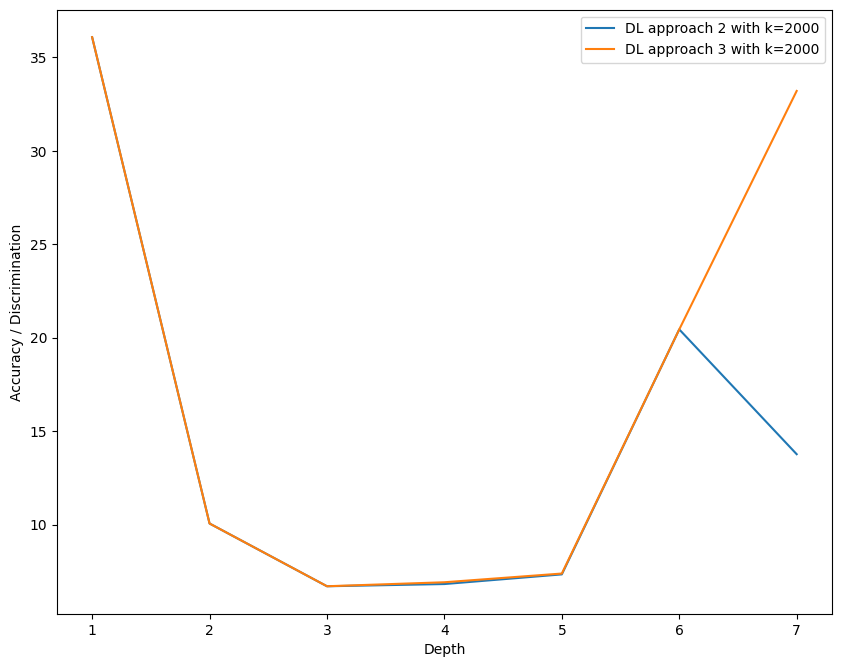

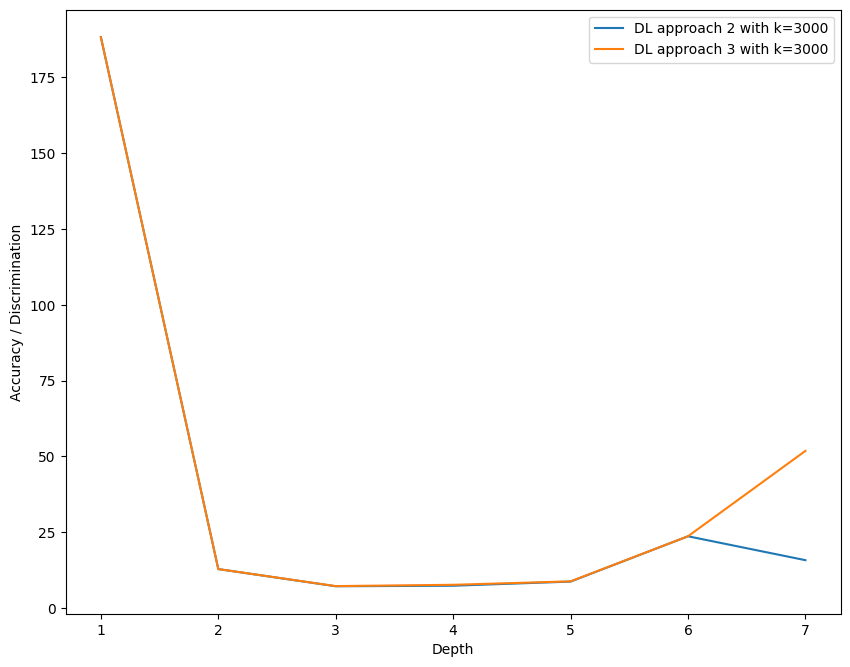

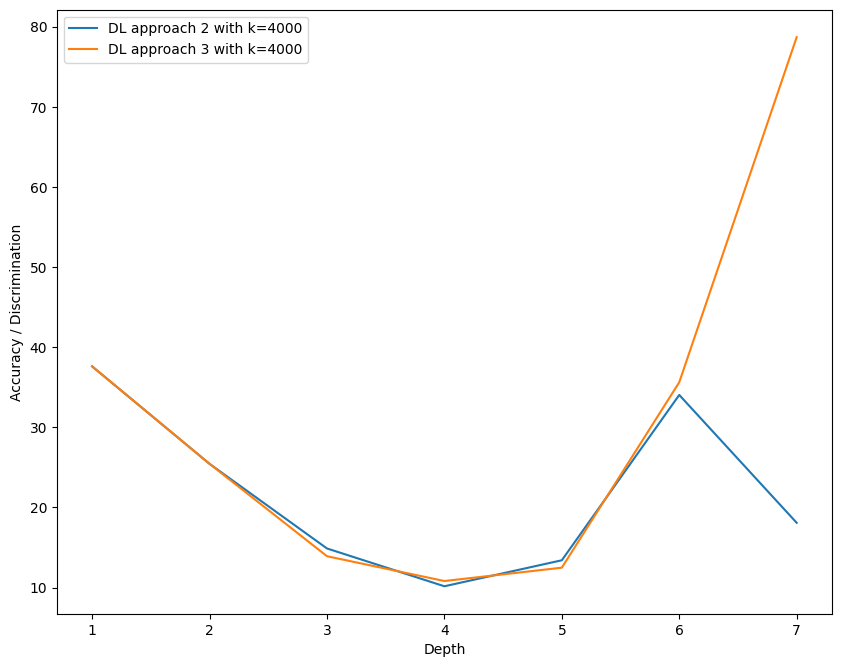

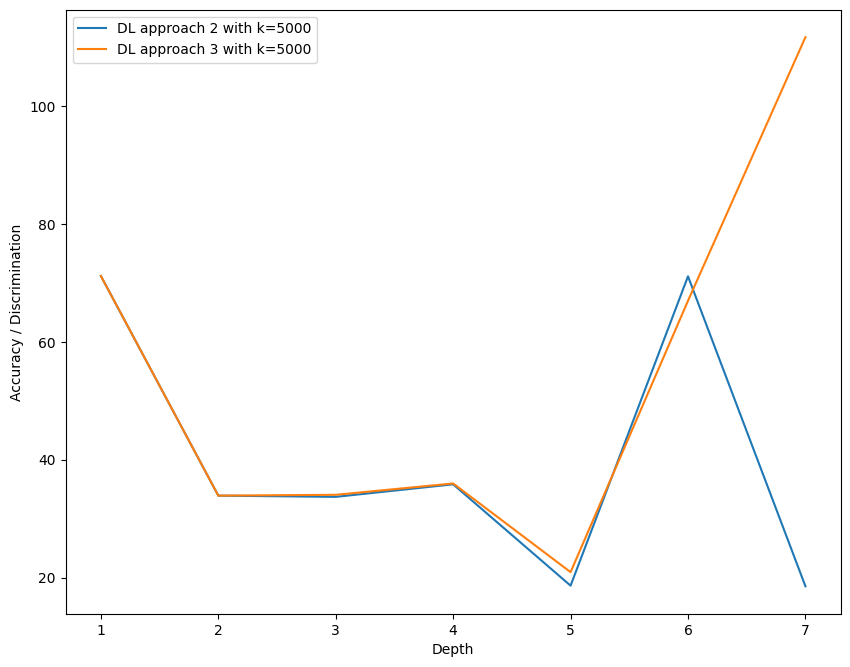

ZeroDivisionError: float division by zero

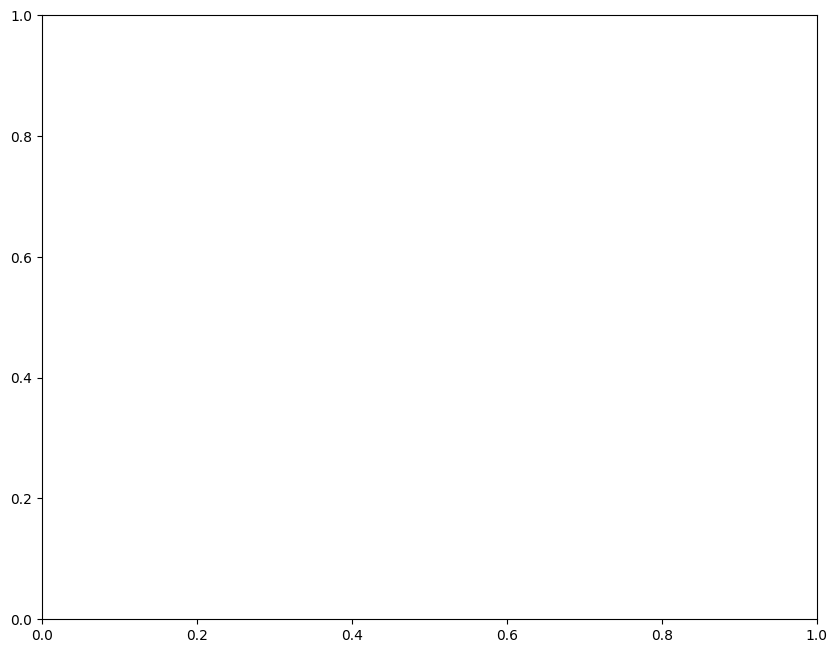

In [8]:
import statistics
def plot2(x_axe, y_axe, r, r2):


    # r = r.loc[r["min_supp"] == 1]
    for k in r['k'].unique():
        fig, ax =  plt.subplots()

        x_values = list()
        y_values = list()

        for depth in r['depth'].unique():
            df1 = r.loc[(r["k"] == k) & (r["depth"] == depth)]
            ratio = list()
            for index, row in df1.iterrows():
                ratio.append(row[ x_axe] / row[y_axe])
            y_values.append(statistics.mean(ratio))
            x_values.append(depth)
        plt.plot(x_values, y_values, label="DL approach 2 with k=" + str(k))
        
        
        x_values = list()
        y_values = list()

        for depth in r2['depth'].unique():
            df1 = r2.loc[(r2["k"] == k) & (r2["depth"] == depth)]
            ratio = list()
            for index, row in df1.iterrows():
                ratio.append(row[ x_axe] / row[y_axe])
            y_values.append(statistics.mean(ratio))
            x_values.append(depth)
        plt.plot(x_values, y_values, label="DL approach 3 with k=" + str(k))

        plt.ylabel("Accuracy"+" / "+"Discrimination")
        plt.xlabel("Depth")
        plt.legend()

        plt.show()
    
plot2("accuracy_pred", "discrimination_train_pred", df_pydl2, df_pydl5)